### Train and Test Data Analysis

This notebook is dedicated to analyse the train and test sets of data generated at the end of the data pipeline.

In [1]:
import re
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from hydra import compose, initialize

from src.analysis.utils import (
    get_elsevier_single_column_fig,
    get_elsevier_double_column_fig,
    get_elsevier_figure_with_subplots
)

In [2]:
plt.rcParams.update({
    "font.size": 9,
    'lines.linewidth': 1,
})

SAVE_FIGURES = True

In [3]:
with initialize(version_base=None, config_path='../../src/conf'):
    cfg = compose(config_name="config")

In [4]:
figures_folder = Path('../../') / cfg['analysis']['figures_folder']
train_data_path = Path('../../') / cfg['data']['train_data_path']
test_data_path = Path('../../') / cfg['data']['test_data_path']

In [5]:
train_df = pd.read_parquet(train_data_path)
test_df = pd.read_parquet(test_data_path)

In [6]:
frac = 0.1

# Create a subset (e.g., 20% of the data)
subset = train_df.sample(frac=frac, random_state=cfg["random_seed"])

In [7]:
print(f"{train_df.shape=}")
print(f"{subset.shape=}")

train_df.shape=(80964, 20)
subset.shape=(8096, 20)


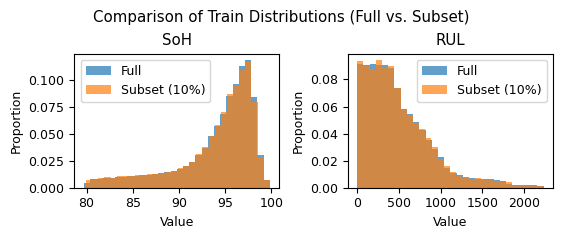

In [13]:
# Plot both distributions
fig, ax = get_elsevier_figure_with_subplots(1, 2, column="one-and-a-half")
sns.histplot(
    train_df['SOH'], 
    stat='probability', 
    bins=30, 
    color='C0', 
    label='Full', 
    alpha=0.7,
    edgecolor=None,
    ax=ax[0]
    )
sns.histplot(
    subset['SOH'], 
    stat='probability', 
    bins=30, 
    color='C1', 
    label=f'Subset ({frac*100:.0f}%)', 
    alpha=0.7,
    edgecolor=None,
    ax=ax[0]
    )

ax[0].set_title('SoH')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Proportion')
ax[0].legend()

sns.histplot(
    train_df['RUL'], 
    stat='probability', 
    bins=30, 
    color='C0', 
    label='Full', 
    alpha=0.7,
    edgecolor=None,
    ax=ax[1]
    )
sns.histplot(
    subset['RUL'], 
    stat='probability', 
    bins=30, 
    color='C1', 
    label=f'Subset ({frac*100:.0f}%)', 
    alpha=0.7,
    edgecolor=None,
    ax=ax[1]
    )

ax[1].set_title('RUL')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Proportion')
ax[1].legend()

fig.suptitle('Comparison of Train Distributions (Full vs. Subset)')

if SAVE_FIGURES:
    fig.savefig(
        figures_folder / "subset_distributions.png",
        dpi=300
    )

plt.show()

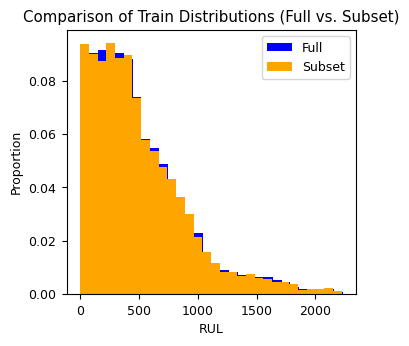

In [9]:
# Create a subset (e.g., 20% of the data)
subset = train_df.sample(frac=0.2, random_state=cfg["random_seed"])

# Plot both distributions
fig, ax = get_elsevier_single_column_fig()
sns.histplot(
    train_df['RUL'], 
    stat='probability', 
    bins=30, 
    color='blue', 
    label='Full', 
    alpha=1,
    edgecolor=None,
    ax=ax
    )
sns.histplot(
    subset['RUL'], 
    stat='probability', 
    bins=30, 
    color='orange', 
    label='Subset', 
    alpha=1,
    edgecolor=None
    )

ax.set_title('Comparison of Train Distributions (Full vs. Subset)')
ax.set_xlabel('RUL')
ax.set_ylabel('Proportion')
ax.legend()
plt.show()